In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

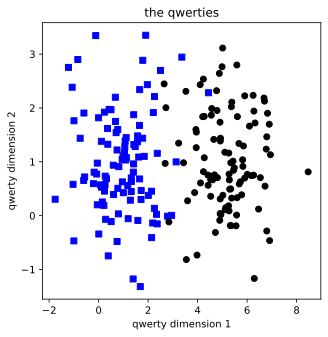

In [8]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [9]:
print(type(data_np))
print(np.shape(data_np))
print('  ')
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
  
<class 'torch.Tensor'>
torch.Size([200, 2])


In [11]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [12]:
learning_rate = 0.05

loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
numEpochs = 1000

losses = torch.zeros(numEpochs)
for epoch in range(numEpochs):
    #forward prop
    yHat = model(data)

    #loss func
    loss = loss_func(yHat, labels)
    losses[epoch] = loss
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

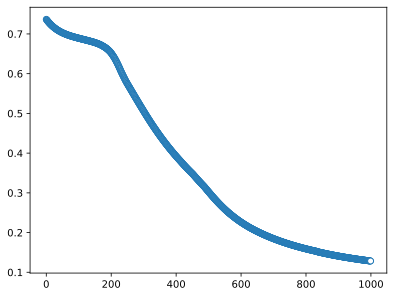

In [14]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.show()

In [19]:
predictions = model(data)

predlabels = predictions>.5

misclassified = np.where(predlabels != labels)[0]

totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print("Final accuracy: %g%%" %totalacc)

Final accuracy: 96%
